# [HW_1_2] Inferencing a CNN model on MNIST dataset
---
## Readme
 - You can find a `[TODO]` label in this Homework by pressing **Ctrl + F** and entering `[TODO]` to search.
 - The main objective of this homework is to learn how to perform inference with a CNN model for classifying the MNIST dataset.
 - We provide:
    1. the trained checkpoint `HW_CNN_MNIST_ckpt.pth`
    2. the model architecture `HW_architecture.png`
 - Plz fill in the `<blank>` to define the model.



## Notice
Plz compress your work into a single zip file :
```plaintext
StudentID_HW_number.zip
    ├── StudentID.docx 	  # word file (including TODOs, results, screenshots, etc)
    └── StudentID.ipynb 	# Jupyter Notebook (your code)
```

For example:
```plaintext
M11307002_HW_1_2.zip
    ├── M11307002.docx 	 # Report (including TODOs, results, screenshots, etc.)
    └── M11307002.ipynb 	# Jupyter Notebook ("File > Download > Download .ipynb")
```
*🎈Submission that do not follow the required format will not recieve any credit!!!*

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load MNIST dataset
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

# Data loader for a single batch
test_loader_batch = DataLoader(test_data, batch_size=64)



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 343kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.16MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.97MB/s]


In [2]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=5, stride=1, padding=2),
            nn.ReLU()
        )
        # Hidden layer size: 128 * 7 * 7 = 6272
        self.out = nn.Linear(128 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1) # Flatten
        output = self.out(x)
        return output

In [8]:
# Initialize the model and load the saved state dictionary
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
model = CNN().to(device)
model.load_state_dict(torch.load('HW_CNN_MNIST_ckpt.pth'))
model.eval()  # Set the model to evaluation mode



CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): ReLU()
  )
  (out): Linear(in_features=6272, out_features=10, bias=True)
)

In [9]:
# Get a batch of test data
images, labels = next(iter(test_loader_batch))
images, labels = images.to(device), labels.to(device)


In [10]:
# Perform inference
with torch.no_grad():
    predictions = model(images)

# Print a batch of the dataset (images and labels)
print("Batch of Images shape:", images.shape)
print("Batch of Labels shape:", labels.shape)
print("Batch of Labels:", labels)

# You can optionally print the predictions as well
# print("Batch of Predictions:", predictions.argmax(1))

Batch of Images shape: torch.Size([64, 1, 28, 28])
Batch of Labels shape: torch.Size([64])
Batch of Labels: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


# Predict (inference) 10 images from MNIST dataset

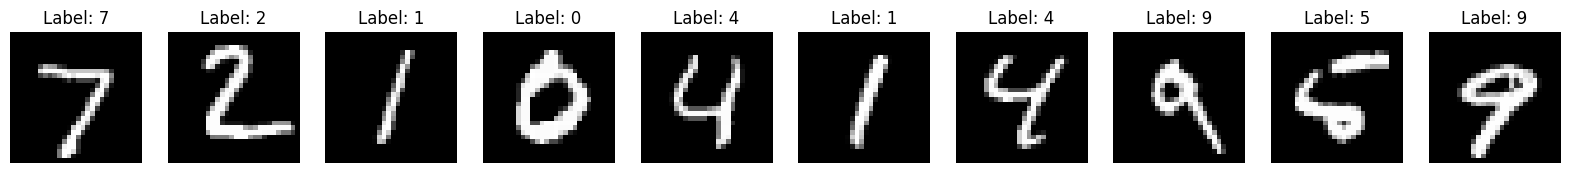

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Take the first 10 images and labels from the batch
num_images_to_display = 10
display_images = images[:num_images_to_display]
display_labels = labels[:num_images_to_display]

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 2))

# Iterate through the images and display them with their labels
for i in range(num_images_to_display):
    # Remove the channel dimension for displaying
    img = display_images[i].squeeze()
    axes[i].imshow(img.cpu().numpy(), cmap='gray')
    axes[i].set_title(f'Label: {display_labels[i].item()}')
    axes[i].axis('off')  # Hide axes

plt.show()